# Logistic Regression

## Import required libraries

In [4]:
import numpy as np  # for the mathematical operations
import pandas as pd #for data manipulation and cleaning
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [6]:
train_data=pd.read_csv("C:\\Users\\saipr\\Downloads\\fraudTest.csv")

In [7]:
test_data=pd.read_csv("C:\\Users\\saipr\\Downloads\\fraudTrain.csv")

In [8]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [9]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [12]:
train_data.shape
test_data.shape

(1296675, 23)

## Data Preprocessing

In [14]:
# Drop unnecessary columns
train_data.drop(['Unnamed: 0','trans_date_trans_time','cc_num','first','last','trans_num','street','state','city','zip','merchant','dob'],axis=1,inplace=True)

In [15]:
train_data.head()

,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [16]:
# Drop unnecessary columns
test_data.drop(['Unnamed: 0','trans_date_trans_time','cc_num','first','last','trans_num','street','state','city','zip','dob','merchant'],axis=1,inplace=True)

In [17]:
test_data.head()

,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [18]:
#checking for missing values
train_data.isnull().sum()
test_data.isnull().sum()

category      0
amt           0
gender        0
lat           0
long          0
city_pop      0
job           0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [19]:
# Encode categorical columns
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_cols = ['category', 'gender', 'job']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])
    label_encoders[col] = le

In [20]:
test_data.head()

,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


In [21]:
# Encode categorical columns
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_cols = ['category', 'gender', 'job']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le

In [22]:
train_data.head()

,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


In [23]:
#stastical measures of data 
train_data.describe()

,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,6.237059,69.392810,0.451367,38.543253,-90.231325,8.822189e+04,241.755040,1.380679e+09,38.542798,-90.231380,0.003860
std,3.912874,156.745941,0.497630,5.061336,13.721780,3.003909e+05,136.327924,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,1.000000,0.000000,20.027100,-165.672300,2.300000e+01,0.000000,1.371817e+09,19.027422,-166.671575,0.000000
25%,3.000000,9.630000,0.000000,34.668900,-96.798000,7.410000e+02,124.000000,1.376029e+09,34.755302,-96.905129,0.000000
50%,6.000000,47.290000,0.000000,39.371600,-87.476900,2.408000e+03,239.000000,1.380762e+09,39.376593,-87.445204,0.000000
75%,10.000000,83.010000,1.000000,41.894800,-80.175200,1.968500e+04,362.000000,1.385867e+09,41.954163,-80.264637,0.000000
max,13.000000,22768.110000,1.000000,65.689900,-67.950300,2.906700e+06,477.000000,1.388534e+09,66.679297,-66.952026,1.000000


In [24]:
#stastical measures of data 
test_data.describe()

,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.227787e+00,7.035104e+01,4.525513e-01,3.853762e+01,-9.022634e+01,8.882444e+04,2.511734e+02,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.913443e+00,1.603160e+02,4.977437e-01,5.075808e+00,1.375908e+01,3.019564e+05,1.401094e+02,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,1.000000e+00,0.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,0.000000e+00,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.000000e+00,9.650000e+00,0.000000e+00,3.462050e+01,-9.679800e+01,7.430000e+02,1.310000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.000000e+00,4.752000e+01,0.000000e+00,3.935430e+01,-8.747690e+01,2.456000e+03,2.510000e+02,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,1.000000e+01,8.314000e+01,1.000000e+00,4.194040e+01,-8.015800e+01,2.032800e+04,3.740000e+02,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.300000e+01,2.894890e+04,1.000000e+00,6.669330e+01,-6.795030e+01,2.906700e+06,4.930000e+02,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Exploratory Data Analysis

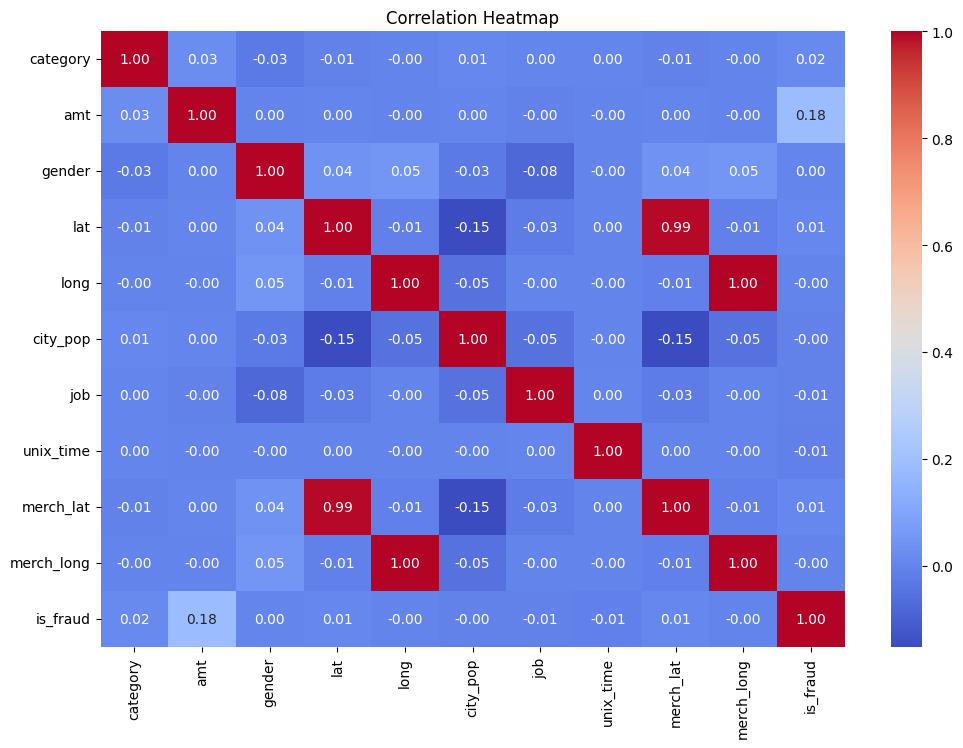

In [26]:
numeric_data = train_data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

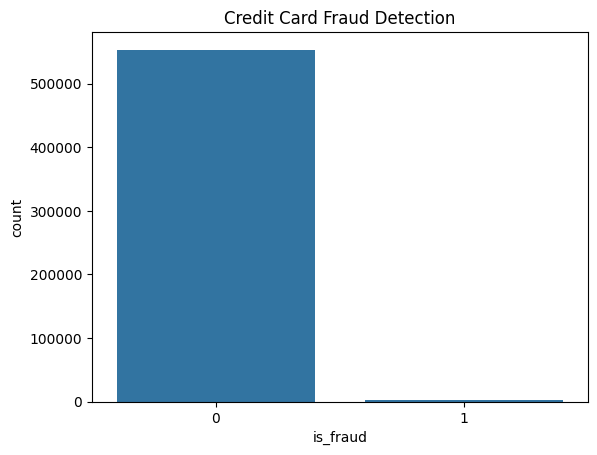

In [27]:
# balancing the dataset
sns.countplot(x='is_fraud', data=train_data)
plt.title('Credit Card Fraud Detection')
plt.show()

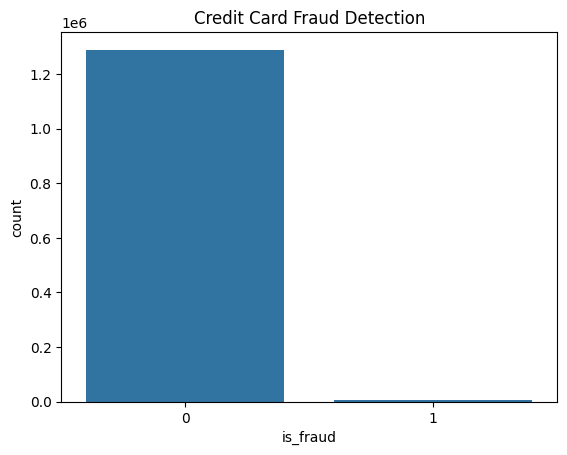

In [28]:
# balancing the dataset
sns.countplot(x='is_fraud', data=test_data)
plt.title('Credit Card Fraud Detection')
plt.show()

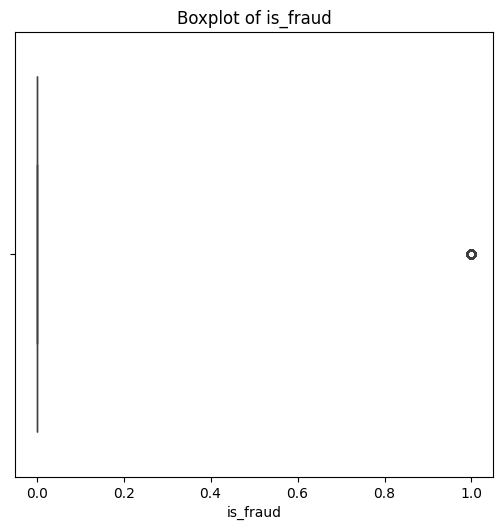

In [29]:
# Visualization of outliers using boxplots
plt.figure(figsize=(15, 10))
# Boxplot for Income
plt.subplot(2, 3, 1)
sns.boxplot(x=test_data['is_fraud'])
plt.title('Boxplot of is_fraud')
plt.xlabel('is_fraud')
plt.tight_layout()
plt.show()

## Divide the data into X and y variable

In [31]:
# Identify features and target variables
X=train_data.drop('is_fraud',axis=1)
y=train_data['is_fraud']

## Split the dataset into train and test

In [33]:
# Divide Data into Training and Testing Parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [35]:
# Train the model using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( penalty='l2', C=1.0,)
classifier.fit(X_train, y_train)

LogisticRegression()

## Model Prediction

In [37]:
# predicting the model
y_pred = classifier.predict(X_test)

## Model Evaluation

Confusion Matrix:
 [[110718      0]
 [   426      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

Accuracy Score: 0.9961671345281796


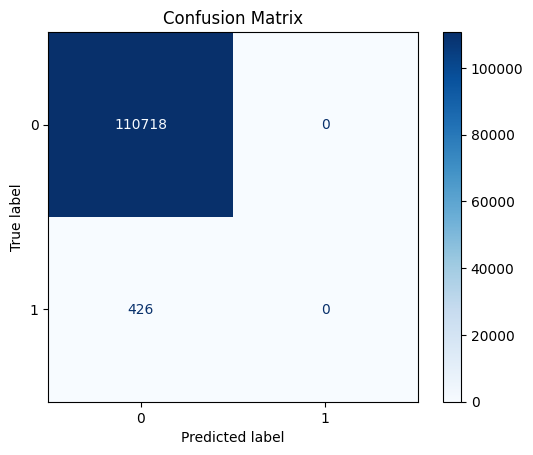

In [39]:
#for evaluting the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Display confusion matrixA
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Predictions on training set
y_train_pred = classifier.predict(X_train)
# Evaluate on training data
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)


Training Accuracy: 0.996133385817916
Test Accuracy: 0.9961671345281796


# Decision Tree

## import libraries

In [95]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## Split the dataset into train and test

In [45]:
# Divide Data into Training and Testing Parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [98]:
DT = DecisionTreeClassifier()
# Train the model
model = DT.fit(X_train,y_train)

## Model Prediction

In [101]:
# Predict on the test set
y_pred = model.predict(X_test)

## Model Evaluation

Confusion Matrix:
 [[110577    141]
 [   157    269]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.66      0.63      0.64       426

    accuracy                           1.00    111144
   macro avg       0.83      0.82      0.82    111144
weighted avg       1.00      1.00      1.00    111144

Accuracy Score: 0.9973187936370834


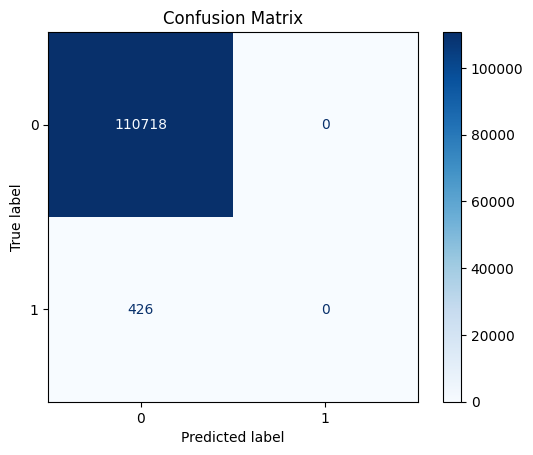

In [104]:
#for evaluting the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Display confusion matrixA
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# Predictions on training set
y_train_pred = classifier.predict(X_train)
# Evaluate on training data
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)


Training Accuracy: 0.996133385817916
Test Accuracy: 0.9973187936370834
